This time series project contains the below topics

1. ARMA(Forecasting, Sales, Monthly)
2. ARIMA(Auto Regression, Moving Average, Integrated)
3. SARIMA(Best for stationary data) we provide p, d, q value
4. FBProphet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

In [5]:
df = pd.read_csv('/Users/saisisir/Downloads/Sisir Entain Laptop/Self Learning /Machine Learning/Kaggle Practice/'
'17. Time Series Analysis/air_passengers_forecast.csv')

In [6]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
#ARIMA(Best for stationary data)
#1. Check data for stationary
#2. Dickey Fuller Test(hypothesis testing)
#      Unit root = 1(data is not stationary)
#     Unit root < 1(data is not stationary)

In [8]:
df.isnull().sum()

Month                      1
Thousands of Passengers    2
dtype: int64

In [9]:
df.dropna(axis = 0, inplace = True)      

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [11]:
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [13]:
#make month as index
df.set_index('Month', inplace = True)

In [14]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

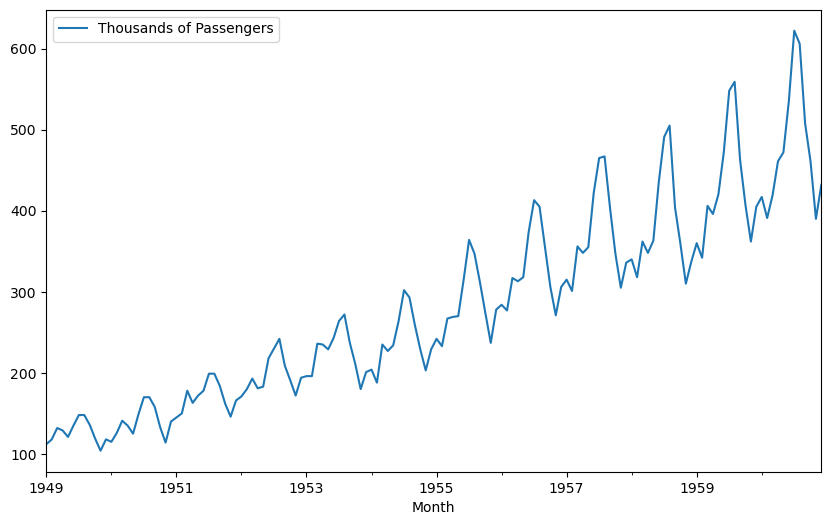

In [15]:
#Plot the dataframe
df.plot(figsize = (10,6))

In [16]:
#import library for adfuller test
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adf_test(df)

ADF Statistics: 0.8153688792060416
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
#finding diff between passengers and shift(1) of passengers
df['first_diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [20]:
#adf test of first differencing
adf_test(df['first_diff'].dropna())

ADF Statistics: -2.829266824170001
p- value: 0.054213290283825294
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
#p value found to be > 0.05, data is non stationary, we move to 2nd differencing
df['second_diff'] = df['first_diff'] - df['first_diff'].shift(1)

#adf test of second differencing
adf_test(df['second_diff'].dropna())

ADF Statistics: -16.38423154246849
p- value: 2.7328918500143186e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
#Now the data is stationary with second differencing. so 'd = 2'

#finding diff between passengers and shift(12) of passengers to identify 12 months differencing
df['passengers_12_diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [23]:
#adf test of 12 months differencing
adf_test(df['passengers_12_diff'].dropna())

ADF Statistics: -3.38302072649248
p- value: 0.011551493085515008
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


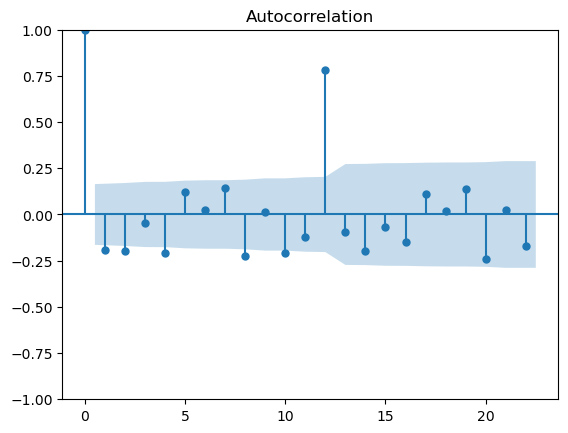

In [24]:
#we use pearson correlation to check how diff months are correlated to each other
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df['second_diff'].dropna()) # we perform MA through ACF

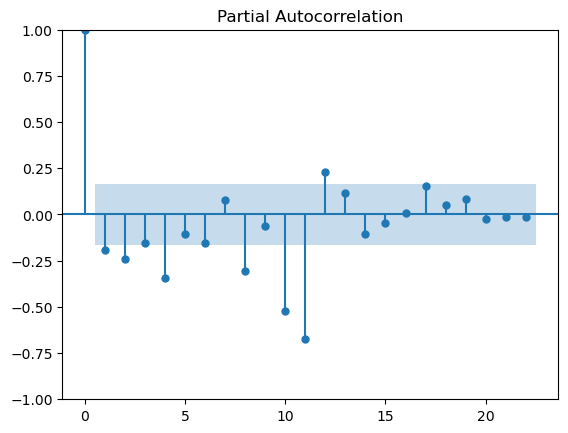

In [25]:
#Since this acf plot gave us 6 pointers that is not covered within lower or upper fences, and the first pointer is 
#for zero, we get 5 pointers. so our q value is 5
pacf = plot_pacf(df['second_diff'].dropna())  # we perform AR through PACF
#We should try for p as minimum as possible. Here we will try p = 2, if it doesnt work, we will next go for p = 10

In [26]:
df.drop('passengers_12_diff', axis = 1, inplace = True)

In [27]:
df

,Thousands of Passengers,first_diff,second_diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [28]:
#create train and test data
from datetime import datetime, timedelta
train_dataset_end = datetime(1955, 12, 1)
test_dataset_end = datetime(1960, 12, 1)

In [29]:
train = df[:train_dataset_end]
test = df[train_dataset_end + timedelta(days = 1): test_dataset_end]

In [30]:
#prediction:
pred_start_date = test.index[0]
pred_end_date = test.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [31]:
test

,Thousands of Passengers,first_diff,second_diff
Month,,,
1956-01-01,284.0,6.0,-35.0
1956-02-01,277.0,-7.0,-13.0
1956-03-01,317.0,40.0,47.0
1956-04-01,313.0,-4.0,-44.0
1956-05-01,318.0,5.0,9.0
1956-06-01,374.0,56.0,51.0
1956-07-01,413.0,39.0,-17.0
1956-08-01,405.0,-8.0,-47.0
1956-09-01,355.0,-50.0,-42.0


In [32]:
#Create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

train

,Thousands of Passengers,first_diff,second_diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1955-08-01,347.0,-17.0,-66.0
1955-09-01,312.0,-35.0,-18.0
1955-10-01,274.0,-38.0,-3.0


In [33]:
#prepare your model
model_arima = ARIMA(train['Thousands of Passengers'], order = (19, 2, 5))

ma_fit = model_arima.fit()
arima_summary = ma_fit.summary()

print(arima_summary)

/Users/saisisir/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/saisisir/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/saisisir/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/saisisir/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/saisisir/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/s

                                  SARIMAX Results                                  
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(19, 2, 5)   Log Likelihood                -303.968
Date:                     Thu, 26 Oct 2023   AIC                            657.935
Time:                             16:20:28   BIC                            718.103
Sample:                         01-01-1949   HQIC                           682.092
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7060      4.508     -0.157      0.876      -9.542       8.129
ar.L2         -0.2628      4.135     -0.064      0.949      -8.367       7.841
ar.L3       

/Users/saisisir/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: ylabel='Density'>

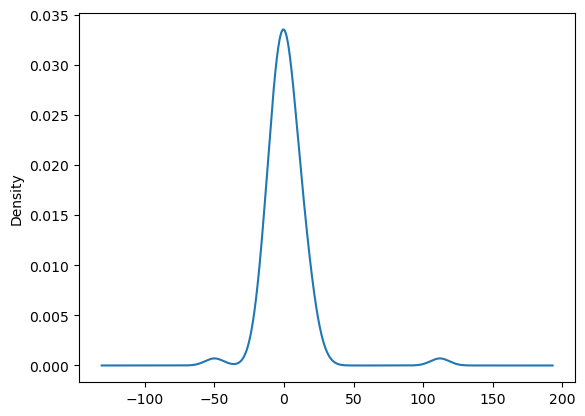

In [34]:
pred = ma_fit.predict(start = pred_start_date, end = pred_end_date)
residuals =  df['Thousands of Passengers'] - pred

#Plot resid function of arima.fit
ma_fit.resid.plot(kind = 'kde')

/var/folders/f2/3yqhtt0101z78fp8m6_yxqq40000gp/T/ipykernel_4326/2477849637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_arima'] = pred


<Axes: xlabel='Month'>

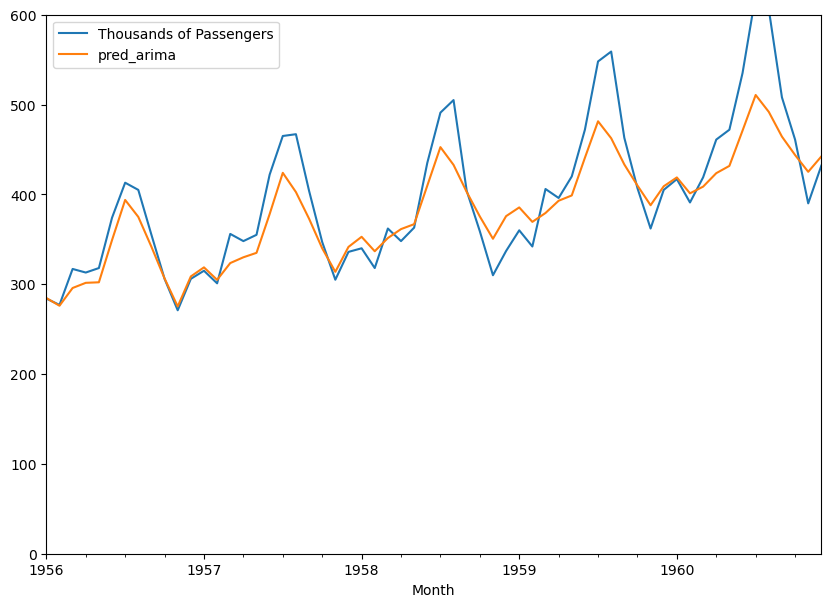

In [35]:
test['pred_arima'] = pred
test[['Thousands of Passengers', 'pred_arima']].plot(figsize= (10, 7), ylim = [0, 600])

We can also try in a similar way for #SARIMA